## Exercise 1

Question
1.Implémenter la fonction f(x) = x
2,Afficher la fonction f entre -6 et + 6 en utilisant matplotlib
3,Implémenter la fonction sigmoid (https://en.wikipedia.org/wiki/Sigmoid_function)
4.Afficher la fonction f entre -6 et + 6 en utilisant matplotlib


In [1]:
#1.Implémenter la fonction f(x) = x
def f(x):
    return x

#print (f(3))


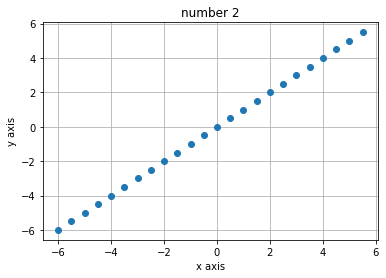

In [22]:
#2,Afficher la fonction f entre -6 et + 6 en utilisant matplotlib

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-6,6,0.5)
#print(x)
plt.plot(x,f(x),'o')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('number 2')
plt.grid(True)
plt.show()

In [23]:
#3,Implémenter la fonction sigmoid 
# 1 / 1 + e^x
# np.exp = e

import numpy as np
def Sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

print(Sigmoid(0))

0.5


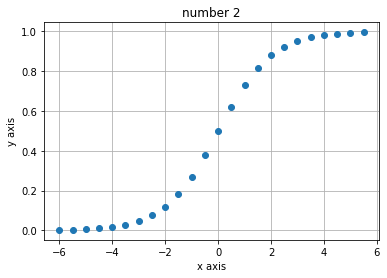

In [24]:
#4.Afficher la fonction f entre -6 et + 6 en utilisant matplotlib

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-6,6,0.5)
#print(x)
plt.plot(x,Sigmoid(x),'o')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('number 2')
plt.grid(True)
plt.show()


## Exercise 2

1. Télécharger la base de données galaxies depuis Moodle

2. En utilisant le fichier GTI770_label_data_set.csv, charger les 50 premières données de chaque classes. Toutes les images seront chargées dans une matrice (X) et les labels dans une matrice(Y). X doit avoir la forme (nombre d'image, nombre de canaux(RGB), hauteur, largeur) et Y (nombre d'image, la classe)

3. Afficher de manière aléatoire, 10 images de chaque classes.

4. Séparer les données de la matrice X en 2 matrices avec un ratio de 70% (X_train) et 30% (X_test), ces 2 matrices doivent avoir le même nombre de classes. Faire la même chose pour (Y). Vérifiez que les données ont toujours les mêmes classes.
 
5. Cropper toutes  les images en utilisant le centre de l'image, la nouvelle dimension doit faire 50x50, vous pouvez utiliser que numpy pour cet exercice. Mettez tous ces images croppées dans une matrice(X_train_crop)

6. Afficher une image de chaque catégorie avec le crop.

7. En utilisant seulement numpy, convertir les images en binaires et mettez les dans une matrice (X_train_binary).

8. Pour chaque image, compter le nombre de pixel noir et pixel blanc, mettre tous les résultats dans une matrice (X_train_plot) avec la forme (nombre d'images, 2). Commentez la fonction de la matrice (X_train_plot)

9. Afficher tous les points contenu dans (X_train_plot) sur un graphique en utlisant matplotlib

#1. Télécharger la base de données galaxies depuis Moodle
X

In [43]:
# En utilisant le fichier GTI770_label_data_set.csv,
# charger les 50 premières données de chaque classes.
# Toutes les images seront chargées dans une matrice (X) et
# les labels dans une matrice(Y).
# X doit avoir la forme (nombre d'image, nombre de canaux(RGB)
# , hauteur, largeur) et Y (nombre d'image, la classe)

import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def getIdFromY(numid):
    return yid[numid]

#imgpath = "C:\\Users\\Vbourgault\\Documents\\GIT\\GTI770-TP0\\images_training\\" #Windows
#csvpath = "C:\\Users\\Vbourgault\\Documents\\GIT\\GTI770-TP0\\csv\\dataset.csv" #Windows

imgpath = "/home/vbourgault/Desktop/gti770/tp00/images_training/" #linux
csvpath = "/home/vbourgault/Desktop/gti770/tp00/csv/dataset.csv"  #Linux
y = [['class']]
x = [[['imgmatrix']]]
d = {}
yid = np.array(['realid']) 
i = 1
err = 0
with open(csvpath,newline='') as f:
    read = csv.reader(f,delimiter=',')
    for row in read:
        key = row[1]
        val = row[0]
        try:
            checkifileexist = open(imgpath + val +".jpg")
        except FileNotFoundError:
            err = err+1
        else:
            if key in d.keys():
                if d.get(key) <= 50:
                    d[key] = d.get(key)+1
                    y = np.append(y,[[key]], axis = 0)
                    yid = np.append(yid,[val])
                    imgMatrix = mpimg.imread(imgpath + getIdFromY(int(i)) +".jpg")
                    x.append(imgMatrix)
                    
                    i += 1
            elif key != 'class':
                d[key] = 1
    f.close()

        
print(y)
print(x[1][:])

    

     


[['class']
 ['smooth']
 ['spiral']
 ['smooth']
 ['smooth']
 ['smooth']
 ['smooth']
 ['smooth']
 ['spiral']
 ['spiral']
 ['smooth']
 ['spiral']
 ['smooth']
 ['smooth']
 ['smooth']
 ['smooth']
 ['smooth']
 ['spiral']
 ['smooth']
 ['smooth']
 ['spiral']
 ['smooth']
 ['smooth']
 ['spiral']
 ['spiral']
 ['smooth']
 ['smooth']
 ['spiral']
 ['smooth']
 ['smooth']
 ['spiral']
 ['smooth']
 ['spiral']
 ['spiral']
 ['spiral']
 ['spiral']
 ['spiral']
 ['spiral']
 ['smooth']
 ['spiral']
 ['spiral']
 ['spiral']
 ['smooth']
 ['smooth']
 ['smooth']
 ['spiral']
 ['spiral']
 ['smooth']
 ['smooth']
 ['smooth']
 ['spiral']
 ['smooth']
 ['spiral']
 ['smooth']
 ['spiral']
 ['spiral']
 ['spiral']
 ['spiral']
 ['spiral']
 ['spiral']
 ['spiral']
 ['spiral']
 ['spiral']
 ['spiral']
 ['spiral']
 ['spiral']
 ['smooth']
 ['smooth']
 ['spiral']
 ['spiral']
 ['spiral']
 ['spiral']
 ['smooth']
 ['smooth']
 ['spiral']
 ['spiral']
 ['smooth']
 ['smooth']
 ['spiral']
 ['smooth']
 ['smooth']
 ['smooth']
 ['spiral']
 ['sp

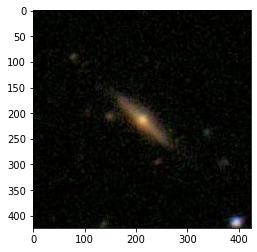

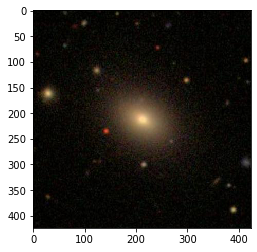

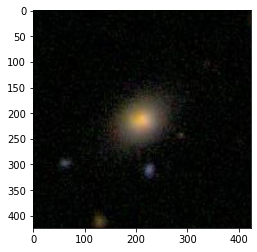

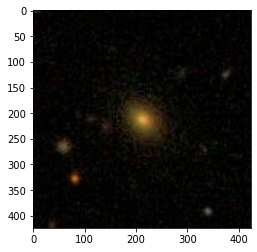

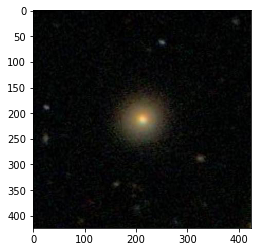

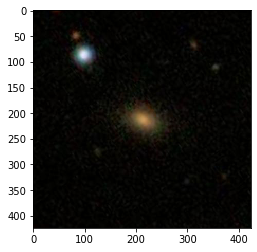

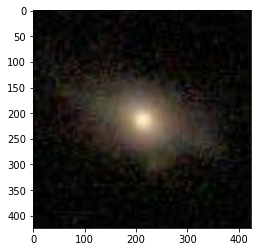

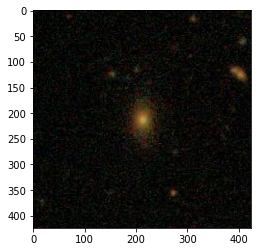

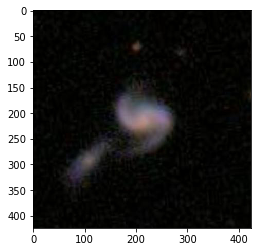

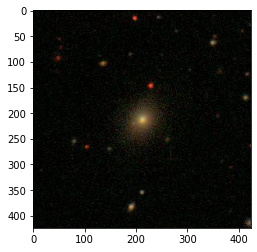

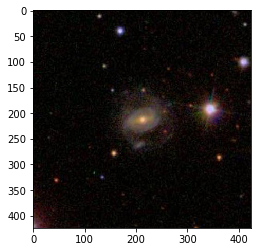

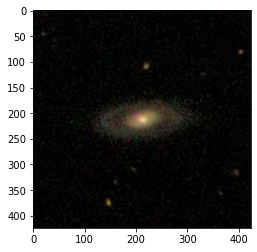

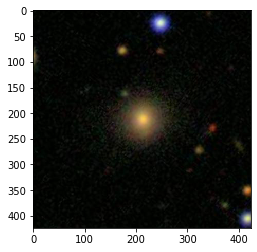

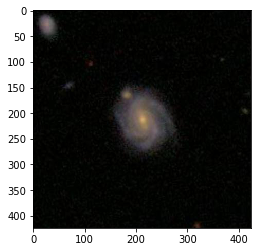

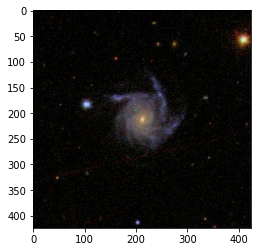

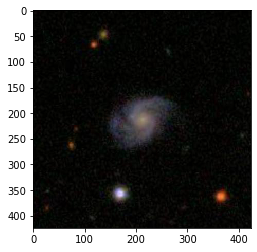

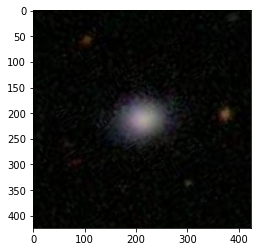

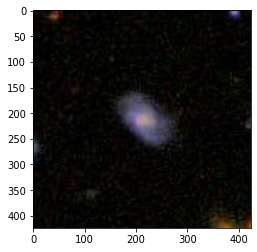

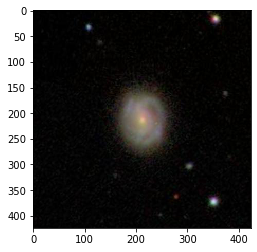

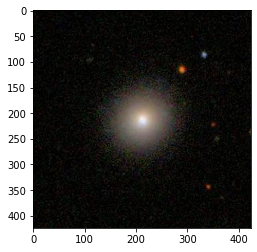

In [206]:
#Afficher de manière aléatoire, 10 images de chaque classes.
import random as rnd

def SampleForEachClass(number):
    result = list()
    for key in d:
        row = np.where(y[1:] == key)
        result = np.append(result,rnd.sample(list(row[0]),number))
    
    return result

def plotImagesfromid(i):
    try:
        img = x[int(i)][:]
        plt.figure()
        plt.imshow(img)
    except FileNotFoundError:
        print("Erreur du fichier csv")

def showImages():
    numid = SampleForEachClass(10)
    for i in numid:
        plotImagesfromid(i)
        


showImages()

In [207]:
#Séparer les données de la matrice X en 2 matrices avec un ratio de 70% (X_train) et 30% (X_test), 
#ces 2 matrices doivent avoir le même nombre de classes. 
#Faire la même chose pour (Y). 
#Vérifiez que les données ont toujours les mêmes classes.
def SamplePercentEachClass(percent):
    rp = percent/100
    result = list()
    for key in d:
        row = np.where(y[:] == key)
        listrow = list(row[0])
        result = np.append(result,rnd.sample(list(row[0]),int(len(listrow)*rp)))
    
    return result


ids = list(SamplePercentEachClass(70))
y_train= np.array([['class']])
x_train = [[['imgmatrix']]]

y_test = np.array([['class']])
x_test = [[['imgmatrix']]]

for i in range(1,len(y)):
    ylist = [y[i][:]]
    xlist = x[i][:]
    if i in ids:
        y_train = np.append(y_train,ylist,axis = 0)
        x_train.append(xlist)
    else:
        y_test = np.append(y_test,ylist,axis = 0)
        x_test.append(xlist)
    

In [208]:
#Cropper toutes les images en utilisant le centre de l'image,
#la nouvelle dimension doit faire 50x50, 
#vous pouvez utiliser que numpy pour cet exercice. 
#Mettez tous ces images croppées dans une matrice(X_train_crop)

x_train_crop = [[['imgmatrix']]]
def cropImage(imgtocrop,cropsize):
    l,h,c = np.shape(imgtocrop)
    centerx = int(l)//2
    centery = int(h)//2
    realcropsize = cropsize//2
    croppedimg = imgtocrop[centerx-realcropsize:centerx+realcropsize,centery-realcropsize:centery+realcropsize]
    return croppedimg
    
for i in range(1,len(x)):
    imgtocrop = x[i]
    croppedimg = cropImage(imgtocrop,50)
    x_train_crop.append(croppedimg)
    
    
print(x_train_crop)
    

[[['imgmatrix']], array([[[102,  86,  63],
        [104,  88,  63],
        [106,  90,  65],
        ...,
        [110,  87,  69],
        [108,  86,  65],
        [107,  85,  64]],

       [[106,  90,  65],
        [108,  92,  67],
        [110,  94,  69],
        ...,
        [117,  92,  72],
        [114,  89,  67],
        [111,  87,  63]],

       [[111,  95,  70],
        [113,  97,  72],
        [115,  99,  74],
        ...,
        [121,  96,  74],
        [118,  94,  70],
        [113,  89,  63]],

       ...,

       [[114,  94,  70],
        [115,  95,  71],
        [115,  95,  71],
        ...,
        [125,  97,  73],
        [124,  96,  72],
        [123,  95,  71]],

       [[109,  91,  67],
        [109,  91,  67],
        [110,  92,  68],
        ...,
        [122,  94,  70],
        [121,  93,  69],
        [120,  92,  68]],

       [[106,  88,  66],
        [107,  89,  65],
        [108,  90,  66],
        ...,
        [121,  93,  69],
        [119,  91,  67],
      

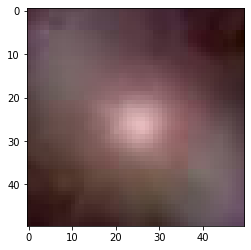

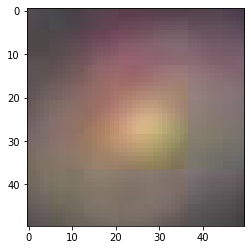

In [203]:
#Afficher une image de chaque catégorie avec le crop.

def plotImagesCrop(i):
    img = x_train_crop[int(i)][:]
    plt.figure()
    plt.imshow(img)
    
def showImagesCrop():
    numid = list(SampleForEachClass(1))
    for i in numid:
        plotImagesCrop(i)
        


showImagesCrop()

In [202]:
# 7. En utilisant seulement numpy, 
# convertir les images en binaires 
# et mettez les dans une matrice (X_train_binary).

x_train_binary = [[]]

for i in range(1,len(x)):
    r = x[i][:,:,0]
    g = x[i][:,:,1]
    b = x[i][:,:,2]
    greyscale = r* 0.2989+ g*  0.5870+ b* 0.1140
    kmax, lmax = np.shape(greyscale)
    binary = np.copy(greyscale)
    for k in range(0,kmax):
        for l in range(0,lmax):
            if greyscale[k,l] >= 128:
                binary[k,l] = 1
            else :
                binary[k,l] = 0
    
    x_train_binary.append(binary)


print(len(x_train_binary))

101


In [191]:
# 8. Pour chaque image, compter le nombre de pixel noir et pixel blanc,
# mettre tous les résultats dans une matrice (X_train_plot)
# avec la forme (nombre dimages, 2).
# Commentez la fonction de la matrice (X_train_plot)

x_train_plot = [[]]

for i in range(1,len(x)):
    r = x[i][:,:,0]
    g = x[i][:,:,1]
    b = x[i][:,:,2]
    greyscale = r* 0.2989+ g*  0.5870+ b* 0.1140
    kmax, lmax = np.shape(greyscale)
    numblack = 0
    numwhite = 0
    for k in range(0,kmax):
        for l in range(0,lmax):
            if greyscale[k,l] == 0:
                numblack += 1
            elif greyscale[k,l] >= 250 :
                numwhite += 1
    
    x_train_plot.append([numblack,numwhite])
    
print(x_train_plot)

[[], [4900, 0], [11000, 0], [2131, 0], [1078, 0], [4038, 0], [3355, 0], [8762, 0], [748, 0], [11567, 0], [7250, 0], [6207, 0], [12331, 0], [5508, 0], [11754, 0], [2036, 0], [4136, 0], [5656, 0], [14412, 0], [5283, 0], [2571, 0], [8788, 0], [7037, 0], [16849, 0], [0, 0], [3614, 0], [5120, 0], [10622, 0], [4157, 0], [40, 0], [9346, 0], [10956, 0], [14960, 0], [20200, 0], [33930, 0], [10637, 0], [2474, 0], [8430, 0], [6365, 0], [9790, 0], [8336, 0], [10813, 0], [12652, 0], [13758, 0], [1371, 0], [11865, 0], [8148, 0], [2, 0], [12354, 0], [10978, 0], [16831, 0], [3905, 0], [320, 17], [1860, 0], [14115, 0], [1240, 0], [6353, 0], [6807, 0], [10241, 0], [7124, 0], [16385, 0], [2235, 0], [13232, 0], [8753, 0], [16497, 0], [13520, 0], [12350, 0], [11741, 0], [3711, 0], [4268, 0], [3459, 0], [21652, 0], [5425, 0], [3866, 0], [12282, 0], [4406, 0], [3403, 0], [7448, 0], [368, 0], [17501, 0], [12843, 0], [2668, 0], [8185, 0], [12375, 0], [6279, 0], [3693, 0], [8652, 0], [15058, 0], [4541, 0], [639

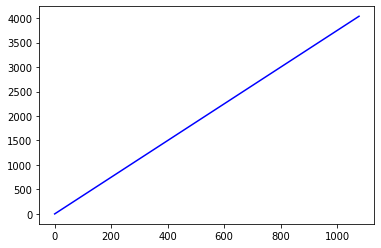

In [199]:
for
plt.figure()
plt.plot(x_train_plot[1:][3],x_train_plot[1:][4],'b')